In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import matplotlib.ticker as mtick
from scipy.stats import linregress

#Path to CSV
final_path = Path("/Users/chaunguyen/Desktop/Project/UpennDataProject1/final_df.csv")
#read csv
final_df = pd.read_csv(final_path)
final_df

,ZCTA5CE10,GEOID10,FreeEligible,ReducedEligible,NotEligible,Free_Reduced_Eligible_Total,Total_Students,PCT_Free,PCT_Reduced,PCT_FreeReduced,...,EBRWNumReady,FinalMathAveScore,FinalAllSbjtAveScore,FinalEWBRWAveScore,MathPctReady,AllSbjtPctReady,EBRWPctReady,count_ntm_stops,stops_per_capita,stops_per_sqmile
0,48917,2648917,2857.0,419.0,1862.0,3276.0,5138.0,0.556053,0.081549,0.637602,...,136.0,431.737912,888.779945,457.082967,0.140110,0.131868,0.373626,77,2.393610,3.098086
1,48864,2648864,2186.0,327.0,4850.0,2513.0,7363.0,0.296890,0.044411,0.341301,...,446.0,517.842420,1051.718950,533.870991,0.451895,0.440233,0.650146,86,3.796570,3.955903
2,49008,2649008,2291.0,190.0,1083.0,2481.0,3564.0,0.642817,0.053311,0.696128,...,0.0,377.435366,778.524390,401.089024,0.000000,0.000000,0.000000,92,5.543170,13.630350
3,49002,2649002,1478.0,230.0,2769.0,1708.0,4477.0,0.330132,0.051374,0.381505,...,446.0,505.665653,1035.593921,529.928267,0.392097,0.379939,0.677812,53,2.601740,2.592890
4,49544,2649544,971.0,193.0,1411.0,1164.0,2575.0,0.377087,0.074951,0.452039,...,125.0,485.395283,986.886792,501.500472,0.325472,0.306604,0.589623,21,2.108430,1.001814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,48234,2648234,2209.0,52.0,208.0,2261.0,2469.0,0.894694,0.021061,0.915755,...,0.0,380.200000,777.700000,397.500000,0.000000,0.000000,0.000000,293,8.481200,37.404350
84,48210,2648210,7455.0,114.0,736.0,7569.0,8305.0,0.897652,0.013727,0.911379,...,104.0,438.858859,887.266366,448.407508,0.159159,0.117117,0.312312,131,4.344220,25.993740
85,48202,2648202,3087.0,332.0,933.0,3419.0,4352.0,0.709329,0.076287,0.785616,...,82.0,416.437716,854.894810,438.420069,0.089965,0.065744,0.283737,178,10.681700,53.505260
86,48235,2648235,4813.0,212.0,1318.0,5025.0,6343.0,0.758789,0.033423,0.792212,...,222.0,460.555022,934.710480,474.139083,0.213974,0.196507,0.484716,225,5.008790,35.994660


In [10]:
final_df.dtypes

ZCTA5CE10                        int64
GEOID10                          int64
FreeEligible                   float64
ReducedEligible                float64
NotEligible                    float64
Free_Reduced_Eligible_Total    float64
Total_Students                 float64
PCT_Free                       float64
PCT_Reduced                    float64
PCT_FreeReduced                float64
CohortCnt                      float64
GradCnt                        float64
GradRate                       float64
MathNumAssessed                float64
AllSbjtNumAssessed             float64
EBRWNumAssessed                float64
MathNumReady                   float64
AllSbjtNumReady                float64
EBRWNumReady                   float64
FinalMathAveScore              float64
FinalAllSbjtAveScore           float64
FinalEWBRWAveScore             float64
MathPctReady                   float64
AllSbjtPctReady                float64
EBRWPctReady                   float64
count_ntm_stops          

In [65]:
#Create linear regression function
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = np.array(x_values) * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    equation = f"y= {round(slope,2)}x + {round(intercept,2)}"
    annotation_x = max(x_values)
    annotation_y = regress_values[-1]
    plt.annotate(equation, (annotation_x, annotation_y), color="r", fontsize=15)
    r_text = f"r-value = {round(rvalue, 3)}"
    plt.text(min(x_values), min(y_values), r_text, color="r", fontsize=12)

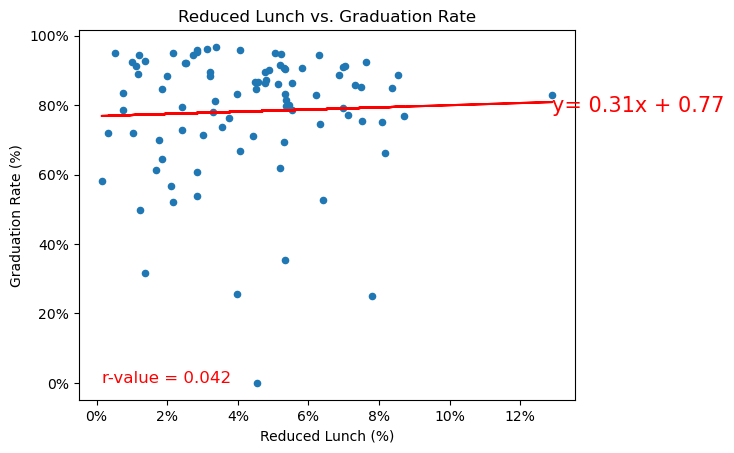

In [66]:
#Reduced Lunch vs. Grad Rate Scatter
x_values = final_df["PCT_Reduced"]
y_values = final_df["GradRate"]

reduced_grad = final_df.plot(kind="scatter", x="PCT_Reduced", y="GradRate", grid=False,
              xlabel="Reduced Lunch (%)", 
              ylabel="Graduation Rate (%)",
              title="Reduced Lunch vs. Graduation Rate")
linear_regression(x_values, y_values)
reduced_grad.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
reduced_grad.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

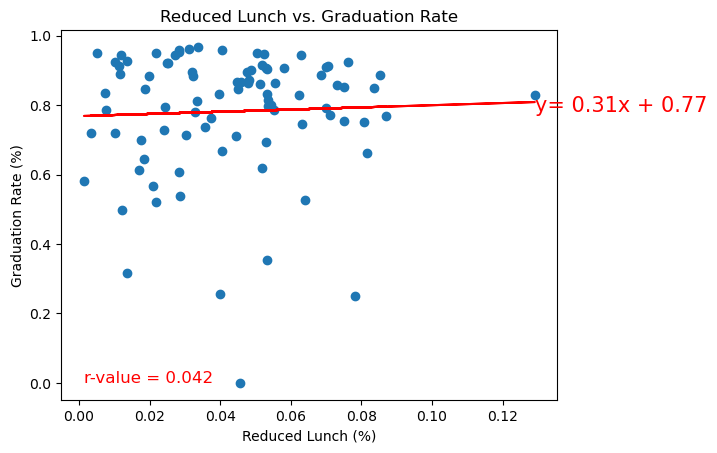

In [67]:
x_values = final_df["PCT_Reduced"]
y_values = final_df["GradRate"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Reduced Lunch (%)")
plt.ylabel("Graduation Rate (%)")
plt.title("Reduced Lunch vs. Graduation Rate")
plt.show()

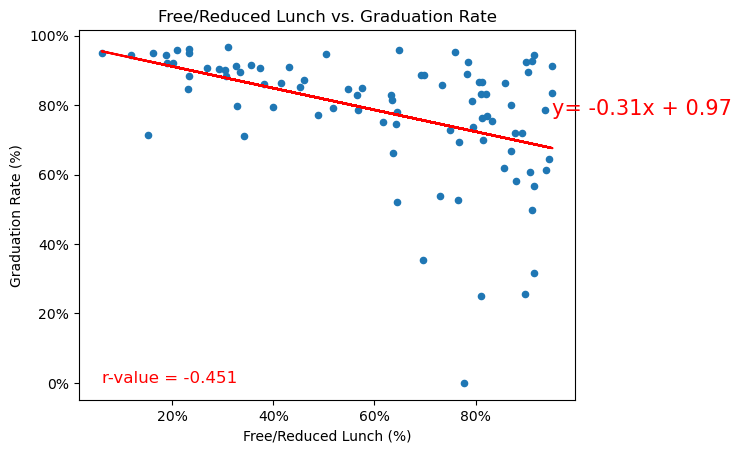

In [68]:
#Free and Reduced Lunch vs. Grad Rate Scatter
x_values = final_df["PCT_FreeReduced"]
y_values = final_df["GradRate"]
freereduced_grad = final_df.plot(kind="scatter", x="PCT_FreeReduced", y="GradRate", grid=False,
              xlabel="Free/Reduced Lunch (%)", 
              ylabel="Graduation Rate (%)",
              title="Free/Reduced Lunch vs. Graduation Rate")
linear_regression(x_values, y_values)
freereduced_grad.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
freereduced_grad.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

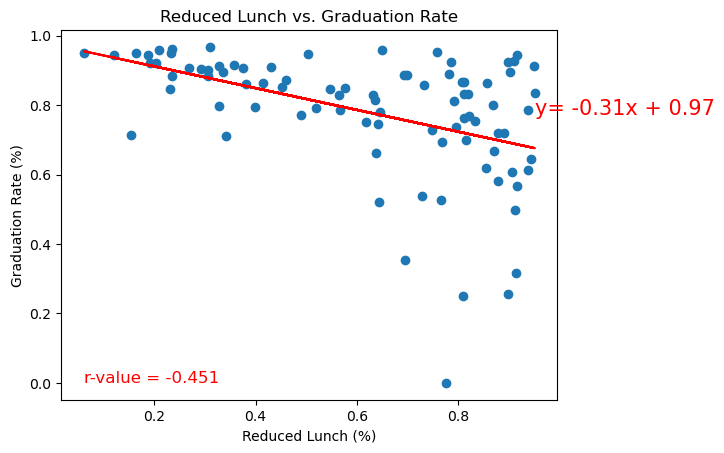

In [69]:
x_values = final_df["PCT_FreeReduced"]
y_values = final_df["GradRate"]

plt.scatter(x_values, y_values)
linear_regression(x_values, y_values)
plt.xlabel("Reduced Lunch (%)")
plt.ylabel("Graduation Rate (%)")
plt.title("Reduced Lunch vs. Graduation Rate")
plt.show()

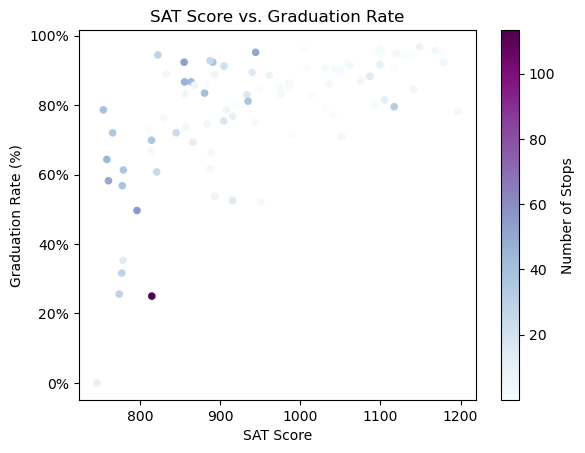

In [18]:
#SAT Scores vs. Grad Rate Scatter by Transit Stops
sat_grad = final_df.plot(kind="scatter", 
                         x="FinalAllSbjtAveScore", 
                         y="GradRate", 
                         c=final_df["stops_per_sqmile"],
                         colorbar=True,
                         cmap="BuPu",
                         grid=False,
                         xlabel="SAT Score", 
                         ylabel="Graduation Rate (%)",
                         title="SAT Score vs. Graduation Rate")
clb = sat_grad.collections[0].colorbar
clb.set_label("Number of Stops")
sat_grad.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

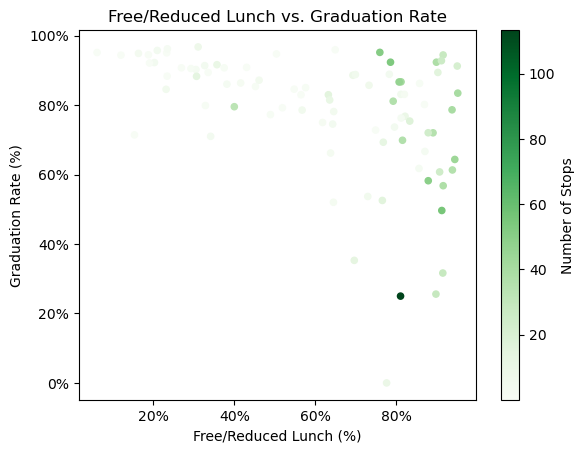

In [19]:
reduced_grad_by_stops = final_df.plot(kind="scatter", 
                         x="PCT_FreeReduced", 
                         y="GradRate", 
                         c=final_df["stops_per_sqmile"],
                         colorbar=True,
                         cmap="Greens",
                         grid=False,
                         xlabel="Free/Reduced Lunch (%)", 
                         ylabel="Graduation Rate (%)",
                         title="Free/Reduced Lunch vs. Graduation Rate")
clb = reduced_grad_by_stops.collections[0].colorbar
clb.set_label("Number of Stops")
reduced_grad_by_stops.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
reduced_grad_by_stops.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))